# Data Transformation

- Normalization (min-max saling) / Standization ( z-score normalization)

- log transformation / power transformation



# 1.0 Normalization :

bring value of feature within specific range ,often between 0 and 1 or -1 and 1.used when dist matters

In [2]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv(r"C:\Users\shaba\OneDrive\csv_xml_sheets\gpa.csv")
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [6]:
df.isnull().sum()

SAT    0
GPA    0
dtype: int64

In [7]:

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
print(df_normalized)



Normalized DataFrame:
         SAT       GPA
0   0.192308  0.000000
1   0.072115  0.085106
2   0.302885  0.099291
3   0.122596  0.241135
4   0.141827  0.304965
..       ...       ...
79  0.725962  0.929078
80  0.423077  0.929078
81  0.848558  0.943262
82  0.788462  0.964539
83  1.000000  1.000000

[84 rows x 2 columns]


# 1.1 StandardScaler:
transform value of feature to have mean of 0 and std 1.

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the standardized DataFrame
print("\nStandardized DataFrame:")
print(df_standardized)



Standardized DataFrame:
         SAT       GPA
0  -1.263383 -3.445384
1  -1.744584 -3.000932
2  -0.820678 -2.926857
3  -1.542480 -2.186104
4  -1.465487 -1.852765
..       ...       ...
79  0.873151  1.406549
80 -0.339476  1.406549
81  1.363977  1.480624
82  1.123376  1.591737
83  1.970291  1.776926

[84 rows x 2 columns]


Mean of 0: Standardization centers the data around 0. This means that some values will be below the mean, resulting in negative values.

Standard Deviation: The standard deviation controls the spread of the data. Since the data is centered around 0, the values are transformed based on how far they are from the mean.

# 2.0 log transformation
Log transformation is a mathematical technique used to convert data into a logarithmic scale. useful in statistics and data analysis when dealing with exponential growth or skewed dist data.

Original DataFrame Histograms:


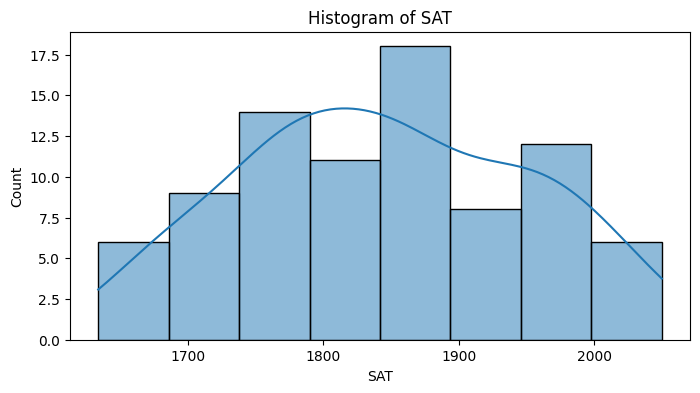

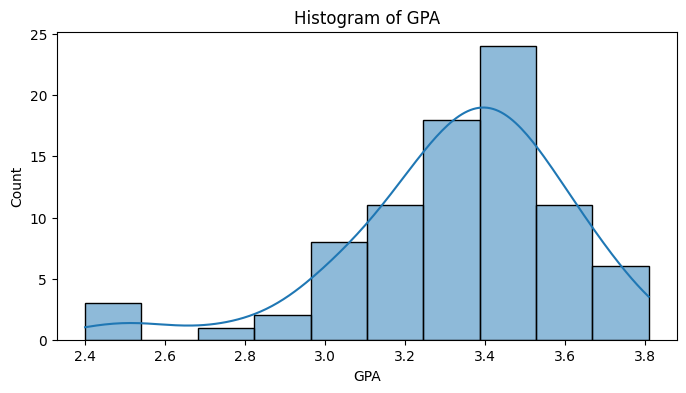


Skewness and Kurtosis:
SAT: Skewness = 0.04, Kurtosis = -0.90
GPA: Skewness = -1.08, Kurtosis = 1.71

Shapiro-Wilk Test for Normality:
SAT: Statistics=0.98, p-value=0.14
GPA: Statistics=0.93, p-value=0.00

Log Transformed DataFrame Histograms:


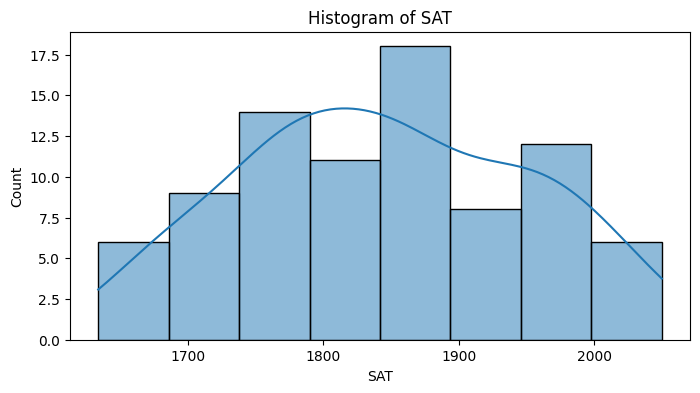

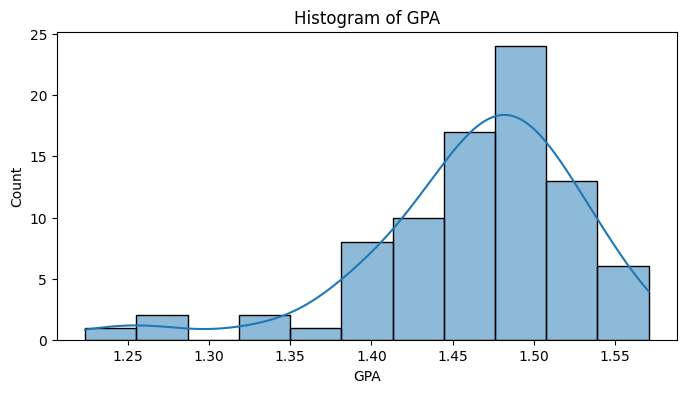


Skewness and Kurtosis After Log Transformation:
SAT: Skewness = 0.04, Kurtosis = -0.90
GPA: Skewness = -1.34, Kurtosis = 2.53


In [9]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro

# Step 1: Load Your CSV Data
df = pd.read_csv(r"C:\Users\shaba\OneDrive\csv_xml_sheets\gpa.csv")

# Step 2: Check the Distribution of Your Data
def plot_histograms(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(dataframe[column].dropna(), kde=True)
        plt.title(f"Histogram of {column}")
        plt.show()

print("Original DataFrame Histograms:")
plot_histograms(df)

# Step 3: Calculate Skewness and Kurtosis
print("\nSkewness and Kurtosis:")
for column in df.columns:
    print(f"{column}: Skewness = {skew(df[column].dropna()):.2f}, Kurtosis = {kurtosis(df[column].dropna()):.2f}")

# Step 4: Perform Statistical Tests for Normality
print("\nShapiro-Wilk Test for Normality:")
for column in df.columns:
    stat, p = shapiro(df[column].dropna())
    print(f"{column}: Statistics={stat:.2f}, p-value={p:.2f}")

# Step 5: Identify Skewed Variables
skewed_columns = [column for column in df.columns if abs(skew(df[column].dropna())) > 1]

# Step 6: Apply Log Transformation
df_log_transformed = df.copy()
for column in skewed_columns:
    df_log_transformed[column] = np.log1p(df[column])

# Re-evaluate the Distribution After Log Transformation
print("\nLog Transformed DataFrame Histograms:")
plot_histograms(df_log_transformed)

# Re-calculate Skewness and Kurtosis After Log Transformation
print("\nSkewness and Kurtosis After Log Transformation:")
for column in df_log_transformed.columns:
    print(f"{column}: Skewness = {skew(df_log_transformed[column].dropna()):.2f}, Kurtosis = {kurtosis(df_log_transformed[column].dropna()):.2f}")


Original Data Analysis
SAT:

Skewness: 0.04 (very close to 0, indicating a nearly symmetrical distribution)

Kurtosis: -0.90 (suggesting the distribution is slightly flatter than a normal distribution)

Shapiro-Wilk p-value: 0.14 (greater than 0.05, suggesting the distribution does not significantly deviate from normality)

GPA:

Skewness: -1.08 (indicating left-skewed distribution)

Kurtosis: 1.71 (suggesting a sharper peak than a normal distribution)

Shapiro-Wilk p-value: 0.00 (less than 0.05, indicating significant deviation from normality)

After Log Transformation Analysis
SAT:

Skewness: 0.04 (remains nearly symmetrical)

Kurtosis: -0.90 (unchanged, still slightly flatter than normal distribution)

GPA:

Skewness: -1.34 (still left-skewed but more pronounced after transformation)

Kurtosis: 2.53 (higher peak, indicating increased kurtosis after transformation)

Interpretation
SAT: The SAT scores are already close to normally distributed, as indicated by the low skewness and acceptable Shapiro-Wilk test p-value. The log transformation didn't significantly change its distribution because it was already quite normal.

GPA: The GPA values were left-skewed and did not follow a normal distribution (confirmed by the Shapiro-Wilk test). After log transformation, the skewness became more pronounced, and kurtosis increased, indicating that log transformation did not achieve the desired normalization effect. This might suggest that another transformation (e.g., square root or Box-Cox) might be more appropriate for the GPA data.

Box-Cox Transformation: A more flexible transformation that includes both log and power transformations.




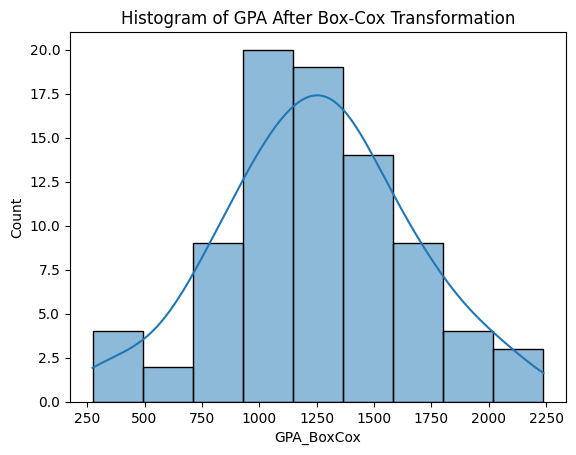

GPA (Box-Cox): Skewness = -0.03, Kurtosis = -0.10


In [11]:
from scipy.stats import boxcox

# Apply Box-Cox Transformation
df['GPA_BoxCox'], _ = boxcox(df['GPA'] + 1)  # Adding 1 to handle zeros and negative values

# Re-evaluate the Distribution After Box-Cox Transformation
sns.histplot(df['GPA_BoxCox'].dropna(), kde=True)
plt.title("Histogram of GPA After Box-Cox Transformation")
plt.show()

# Check Skewness and Kurtosis After Box-Cox Transformation
print(f"GPA (Box-Cox): Skewness = {skew(df['GPA_BoxCox'].dropna()):.2f}, Kurtosis = {kurtosis(df['GPA_BoxCox'].dropna()):.2f}")


# 2.1 power transformation
power transformation is a statistical technique used to make data more closely to a normal dist.